In [1]:
import os
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

import pymannkendall as mk

For citing python Mann Kendall test results, use:

Hussain et al., (2019). pyMannKendall: a python package for non parametric Mann Kendall family of trend tests.. Journal of Open Source Software, 4(39), 1556, https://doi.org/10.21105/joss.01556

In [37]:
def mk_savepng(data, res, huc_name):
    '''
        saves graph of seasonal surface water area values
        with MK trendline and seasonal MK function output

            data : the seasonal percent surface water area 
                   data used to run the seasonal MK test
             res : the results of the seasonal MK test
        huc_name : the name of the HUC (HUC ID)
    '''

    plt.rcParams["font.family"] = "Times New Roman"
    plt.rcParams["font.size"] = "16"

    hfont = {'fontname': 'Consolas'}

    fig = plt.figure(constrained_layout=True,figsize = (14,6))
    subfigs = fig.subfigures(1,2, wspace=0, hspace=0, width_ratios=[2,1])

    ax1 = subfigs[0].subplots()
    ax2 = subfigs[1].subplots()

    # fig, ax = plt.subplots(figsize=(12, 8))
    # res = mk.seasonal_test(huc_data_water, period=4)
    trend_line = np.arange(len(data)) / 4 * res.slope + res.intercept

    ax1.plot(data)
    ax1.plot(trend_line)
    ax1.legend(['observed (seasonal)', 'trend line'])
    ax1.set_xticks([0,4,8,12,16,20,24,28,32,36,40,44,48,52,56,60,64,68,72], minor=False)
    ax1.set_xticks([1,2,3, 5,6,7, 9,10,11, 13,14,15, 17,18,19, 21,22,23, \
                25,26,27, 29,30,31, 33,34,35, 37,38,39, 41,42,43, \
                45,46,47, 49,50,51, 53,54,55, 57,58,59, 61,62,63, \
                65,66,67, 69,70,71, 73,74,75], minor=True)
    ax1.set_xticklabels(['2000','','2002','','2004','','2006','','2008','',\
        '2010','','2012','','2014','','2016','','2018'], size = 16)

    ax1.xaxis.grid(True, which='major', linestyle = (0, (5, 10)))
    ax1.set_ylabel('Percent Surface Water Area',size=20)
    ax1.set_xlabel('Year', size=20)
    ax1.set_title('HUC {0}'.format(huc_name), size=20)

    ax2.text(0,0.1,\
'       Trend presence (h) : {0}\n\
  Trend direction (trend) : {1}\n\
              p-value (p) : {2}\n\
Normalized test stat. (z) : {3}\n\
      Kendall\'s Tau (Tau) : {4}\n\
   Mann-Kendall Score (s) : {5}\n\
       Variance S (var_s) : {6}\n\
Theil-Sen estimate/slope\n\
                  (slope) : {7}\n\
Kendall-Theil Robust Line \n\
    intercept (intercept) : {8}'\
            .format(res.h, res.trend, round(res.p,6), \
                round(res.z,6), round(res.Tau,6), res.s, \
                res.var_s, round(res.slope,6), round(res.intercept,6)), **hfont)

    ax2.axis('off')

    plt.savefig('../imgs/Mann-Kendall/estimated-MERF/{0}_MERF_EST.png'.format(huc_name), dpi=300,\
        facecolor='w', edgecolor='w', transparent=False, pad_inches=0)

    plt.close()

    return

In [2]:
dswe = pd.read_csv('../data/all_data_0018.csv', index_col=0)

dswe.head()

,HUC08,SEASON,YEAR,PR_WATER,MAX_TMP,MIN_TMP,PRECIP,PR_AG,PR_INT,PR_NAT,PR_POP
0,3150106,Fall,2000,0.017054,0.065982,0.079972,0.002974,0.016109,0.105469,0.855719,48.657514
1,3160107,Fall,2000,0.001736,-0.043130,0.046309,0.034296,0.007119,0.043102,0.944771,8.825433
2,3160203,Fall,2000,0.006706,0.038589,0.085311,0.019101,0.002354,0.033000,0.954051,8.959161
3,3150203,Fall,2000,0.013039,0.034896,0.083323,0.023734,0.019356,0.028915,0.932121,5.552092
4,3150204,Fall,2000,0.007564,0.044560,0.094443,0.009426,0.032437,0.029343,0.926452,6.884218


In [3]:
# add Year-Szn column

dswe['YR_SZN'] = dswe['YEAR'] * 100

dswe.loc[dswe.SEASON == "Spring", "YR_SZN"] += 0
dswe.loc[dswe.SEASON == "Summer", "YR_SZN"] += 25
dswe.loc[dswe.SEASON == "Fall", "YR_SZN"] += 50
dswe.loc[dswe.SEASON == "Winter", "YR_SZN"] += 75


dswe = dswe.sort_values(by=['YR_SZN'])

In [4]:
dswe

,HUC08,SEASON,YEAR,PR_WATER,MAX_TMP,MIN_TMP,PRECIP,PR_AG,PR_INT,PR_NAT,PR_POP,YR_SZN
0,3150106,Spring,2000,0.017830,-0.075810,-0.032217,-0.004154,0.016109,0.105469,0.855719,48.657514,200000
211,3110103,Spring,2000,0.002895,-0.148760,0.042900,0.130435,0.091452,0.045497,0.858258,13.094326,200000
210,3110201,Spring,2000,0.003516,-0.140423,0.049204,0.110960,0.008725,0.042365,0.942867,5.998170,200000
209,3070203,Spring,2000,0.276124,-0.130166,0.038944,0.042530,0.000056,0.074184,0.648284,34.665145,200000
208,3070204,Spring,2000,0.012779,-0.125499,0.061354,0.125610,0.000379,0.060560,0.922108,24.076206,200000
...,...,...,...,...,...,...,...,...,...,...,...,...
5679,5110005,Winter,2018,0.041917,-0.043087,-0.160042,-0.187616,0.494538,0.058250,0.438100,38.538760,201875
5678,5110004,Winter,2018,0.028372,-0.052952,-0.171473,-0.182816,0.165029,0.041777,0.783792,14.404812,201875
5677,5140205,Winter,2018,0.020220,0.018770,-0.110795,-0.185783,0.251629,0.036407,0.702736,15.433345,201875
5684,8060202,Winter,2018,0.021819,-0.061108,-0.212518,-0.084384,0.099503,0.064943,0.818865,23.672584,201875


In [5]:
huc_data = dswe[dswe['HUC08']==3150106]

huc_data = huc_data.set_index('YR_SZN')
huc_data

,HUC08,SEASON,YEAR,PR_WATER,MAX_TMP,MIN_TMP,PRECIP,PR_AG,PR_INT,PR_NAT,PR_POP
YR_SZN,,,,,,,,,,,
200000,3150106,Spring,2000,0.017830,-0.075810,-0.032217,-0.004154,0.016109,0.105469,0.855719,48.657514
200025,3150106,Summer,2000,0.016471,-0.397667,0.222558,0.203678,0.016109,0.105469,0.855719,48.657514
200050,3150106,Fall,2000,0.017054,0.065982,0.079972,0.002974,0.016109,0.105469,0.855719,48.657514
200075,3150106,Winter,2000,0.017620,0.330179,0.316637,0.107866,0.016109,0.105469,0.855719,48.657514
200100,3150106,Spring,2001,0.019752,0.204735,0.062648,-0.139087,0.016109,0.105469,0.855719,48.642271
...,...,...,...,...,...,...,...,...,...,...,...
201775,3150106,Winter,2017,0.017986,-0.032064,-0.153957,0.049960,0.026635,0.113688,0.836450,51.989707
201800,3150106,Spring,2018,0.018169,0.069883,-0.017600,-0.021144,0.027403,0.113746,0.835762,51.239224
201825,3150106,Summer,2018,0.016603,0.058579,-0.269064,-0.099292,0.027403,0.113746,0.835762,51.239224


In [ ]:
plt.figure()

ax = huc_data['PR_WATER'].plot()

In [ ]:
huc_data_water = np.asarray(huc_data['PR_WATER'])

huc_data_water

In [ ]:
res = mk.seasonal_test(huc_data['PR_WATER'], period=4)

mk_savepng(np.asarray(huc_data['PR_WATER']), res, 3150106)

In [6]:
mk_res_lst = [0] * 310
huc_lst = dswe['HUC08'].unique()

for i in range(len(mk_res_lst)):
    
    temp_df = dswe[dswe['HUC08']==huc_lst[i]]
    temp_df = temp_df.set_index('YR_SZN')

    res = mk.seasonal_test(temp_df['PR_WATER'], period=4)

    mk_res_lst[i] = [huc_lst[i], res.trend, res.h, res.p, res.z, res.Tau, res.s, res.var_s, res.slope, res.intercept]

    mk_savepng(np.asarray(temp_df['PR_WATER']), res, huc_lst[i])





In [9]:
mk_res_df = pd.DataFrame(mk_res_lst, columns=['HUC','TREND_DIR','TREND_PRES','P_VALUE','Z','TAU','S','VAR_S','SLOPE','INTERCEPT'])
mk_res_df

,HUC,TREND_DIR,TREND_PRES,P_VALUE,Z,TAU,S,VAR_S,SLOPE,INTERCEPT
0,3150106,decreasing,True,1.236795e-02,-2.501468,-0.210526,-144.0,3268.0,-0.000042,0.017776
1,3110103,no trend,False,3.187214e-01,0.997089,0.084795,58.0,3268.0,0.000004,0.002678
2,3110201,increasing,True,1.394662e-12,7.084578,0.593567,406.0,3268.0,0.000093,0.003024
3,3070203,no trend,False,9.025430e-01,-0.122449,-0.011696,-8.0,3268.0,-0.000011,0.284494
4,3070204,no trend,False,9.025430e-01,-0.122449,-0.011696,-8.0,3268.0,-0.000003,0.013411
...,...,...,...,...,...,...,...,...,...,...
305,3180002,no trend,False,8.749020e-01,0.157435,0.014620,10.0,3268.0,0.000003,0.022503
306,3180003,no trend,False,5.876281e-01,0.542276,0.046784,32.0,3268.0,0.000016,0.004912
307,8060205,increasing,True,3.737523e-02,2.081641,0.175439,120.0,3268.0,0.000062,0.004237
308,8060206,increasing,True,4.857446e-03,2.816338,0.236842,162.0,3268.0,0.000191,0.015418


In [10]:
mk_res_df.to_csv('../data/mk_obs.csv')

In [9]:
est_dswe = pd.read_csv('../data/sim_pred.csv', index_col=0)

est_dswe.head()

,HUC08,SEASON,YEAR,OBS_LOG_WATER,EST_LOG_WATER,PRED_LOG_WATER
0,3150106,Fall,2000,-4.070769,-4.074048,-4.147693
1,3160107,Fall,2000,-6.350615,-6.294755,-7.251563
2,3160203,Fall,2000,-5.003225,-4.998612,-4.981554
3,3150203,Fall,2000,-4.339073,-4.290778,-3.330743
4,3150204,Fall,2000,-4.883014,-4.847598,-4.889956


In [10]:
est_dswe = est_dswe[['HUC08','SEASON','YEAR','OBS_LOG_WATER','EST_LOG_WATER']][0:23560]

est_dswe

,HUC08,SEASON,YEAR,OBS_LOG_WATER,EST_LOG_WATER
0,3150106,Fall,2000,-4.070769,-4.074048
1,3160107,Fall,2000,-6.350615,-6.294755
2,3160203,Fall,2000,-5.003225,-4.998612
3,3150203,Fall,2000,-4.339073,-4.290778
4,3150204,Fall,2000,-4.883014,-4.847598
...,...,...,...,...,...
23555,6010105,Winter,2018,-5.465085,-5.668583
23556,5050001,Winter,2018,-5.266494,-5.216390
23557,6010102,Winter,2018,-4.503085,-4.519062
23558,6010205,Winter,2018,-4.131469,-4.199854


In [11]:
# add Year-Szn column

est_dswe['YR_SZN'] = est_dswe['YEAR'] * 100

est_dswe.loc[est_dswe.SEASON == "Spring", "YR_SZN"] += 0
est_dswe.loc[est_dswe.SEASON == "Summer", "YR_SZN"] += 25
est_dswe.loc[est_dswe.SEASON == "Fall", "YR_SZN"] += 50
est_dswe.loc[est_dswe.SEASON == "Winter", "YR_SZN"] += 75


est_dswe = est_dswe.sort_values(by=['YR_SZN'])

In [12]:
est_dswe['OBS_WATER'] = np.exp(est_dswe['OBS_LOG_WATER'])
est_dswe['EST_WATER'] = np.exp(est_dswe['EST_LOG_WATER'])

est_dswe

,HUC08,SEASON,YEAR,OBS_LOG_WATER,EST_LOG_WATER,YR_SZN,OBS_WATER,EST_WATER
5890,3150106,Spring,2000,-4.026288,-4.033201,200000,0.017840,0.017718
6101,3110103,Spring,2000,-5.841297,-5.882389,200000,0.002905,0.002788
6100,3110201,Spring,2000,-5.647477,-5.717227,200000,0.003526,0.003289
6099,3070203,Spring,2000,-1.286869,-1.275792,200000,0.276134,0.279210
6098,3070204,Spring,2000,-4.359163,-4.342260,200000,0.012789,0.013007
...,...,...,...,...,...,...,...,...
23349,5110005,Winter,2018,-3.171834,-3.459252,201875,0.041927,0.031453
23348,5110004,Winter,2018,-3.561983,-3.909772,201875,0.028382,0.020045
23347,5140205,Winter,2018,-3.900602,-4.015546,201875,0.020230,0.018033
23354,8060202,Winter,2018,-3.824518,-3.891605,201875,0.021829,0.020413


In [30]:
test_df = est_dswe[['HUC08','YR_SZN','OBS_WATER']]
test_df_2 = dswe[['HUC08','YR_SZN','PR_WATER']]

test_df = test_df.merge(test_df_2, left_on= ['HUC08','YR_SZN'], right_on=['HUC08','YR_SZN'])

In [38]:
mk_est_res_lst = [0] * 310
huc_lst = est_dswe['HUC08'].unique()

for i in range(len(mk_est_res_lst)):
    
    temp_df = est_dswe[est_dswe['HUC08']==huc_lst[i]]
    temp_df = temp_df.set_index('YR_SZN')

    res = mk.seasonal_test(temp_df['EST_WATER'], period=4)

    mk_est_res_lst[i] = [huc_lst[i], res.trend, res.h, res.p, res.z, res.Tau, res.s, res.var_s, res.slope, res.intercept]

    mk_savepng(np.asarray(temp_df['EST_WATER']), res, huc_lst[i])



In [39]:
mk_est_res_df = pd.DataFrame(mk_est_res_lst, columns=['HUC','TREND_DIR','TREND_PRES','P_VALUE','Z','TAU','S','VAR_S','SLOPE','INTERCEPT'])
mk_est_res_df

,HUC,TREND_DIR,TREND_PRES,P_VALUE,Z,TAU,S,VAR_S,SLOPE,INTERCEPT
0,3150106,no trend,False,3.359978e-01,-0.962103,-0.081871,-56.0,3268.0,-1.218791e-05,0.017415
1,3110103,no trend,False,2.274313e-01,1.207002,0.102339,70.0,3268.0,6.774200e-06,0.002727
2,3110201,increasing,True,6.213474e-12,6.874665,0.576023,394.0,3268.0,7.931727e-05,0.003202
3,3070203,no trend,False,9.025430e-01,-0.122449,-0.011696,-8.0,3268.0,-2.968797e-05,0.286445
4,3070204,no trend,False,9.581475e-01,0.052478,0.005848,4.0,3268.0,7.200287e-07,0.013579
...,...,...,...,...,...,...,...,...,...,...
305,3180002,no trend,False,1.669932e-01,-1.381930,-0.116959,-80.0,3268.0,-2.664445e-05,0.022773
306,3180003,no trend,False,4.951007e-01,0.682219,0.058480,40.0,3268.0,1.165119e-05,0.004828
307,8060205,no trend,False,5.655768e-02,1.906714,0.160819,110.0,3268.0,3.975113e-05,0.004444
308,8060206,increasing,True,2.934590e-04,3.621007,0.304094,208.0,3268.0,3.551419e-04,0.015171


In [40]:
mk_res_df.to_csv('../data/mk_est_merf.csv')

(array([  1.,   0.,   0.,   1.,   1.,   2.,   7., 252.,  42.,   4.]),
 array([-8.67525693e-04, -7.56050979e-04, -6.44576265e-04, -5.33101552e-04,
        -4.21626838e-04, -3.10152125e-04, -1.98677411e-04, -8.72026973e-05,
         2.42720163e-05,  1.35746730e-04,  2.47221444e-04]),
 <BarContainer object of 10 artists>)

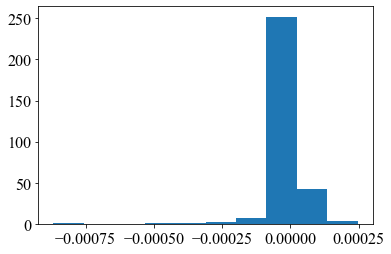

In [53]:
plt.hist(mk_res_df['SLOPE'] - mk_est_res_df['SLOPE'])

(array([  2.,   3., 296.,   5.,   3.,   0.,   0.,   0.,   0.,   1.]),
 array([-0.00230804, -0.00144602, -0.00058401,  0.00027801,  0.00114002,
         0.00200204,  0.00286405,  0.00372607,  0.00458808,  0.0054501 ,
         0.00631211]),
 <BarContainer object of 10 artists>)

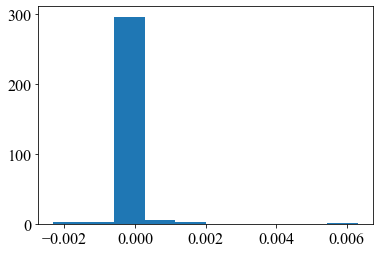

In [54]:
plt.hist(mk_res_df['SLOPE'])

(array([  2.,   4., 297.,   4.,   1.,   1.,   0.,   0.,   0.,   1.]),
 array([-0.00223596, -0.00134376, -0.00045155,  0.00044065,  0.00133285,
         0.00222506,  0.00311726,  0.00400946,  0.00490167,  0.00579387,
         0.00668607]),
 <BarContainer object of 10 artists>)

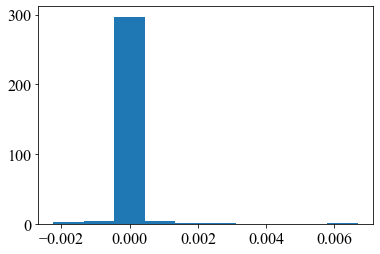

In [55]:
plt.hist(mk_est_res_df['SLOPE'])

In [49]:
print('max:',max(mk_res_df['SLOPE']), 'med:',np.median(mk_res_df['SLOPE']), 'min:',min(mk_res_df['SLOPE']))

max: 0.006312113873529299 med: 4.842370894382104e-06 min: -0.0023080399533062903


In [70]:
print('max:',max(mk_est_res_df['SLOPE']), 'min:',min(mk_est_res_df['SLOPE']))
print(mk_est_res_df[mk_est_res_df['HUC']==3020201]['SLOPE'] + mk_est_res_df[mk_est_res_df['HUC']==3020201]['INTERCEPT'])

max: 0.006686073700224809 min: -0.0022359595355921167
238    0.011396
dtype: float64


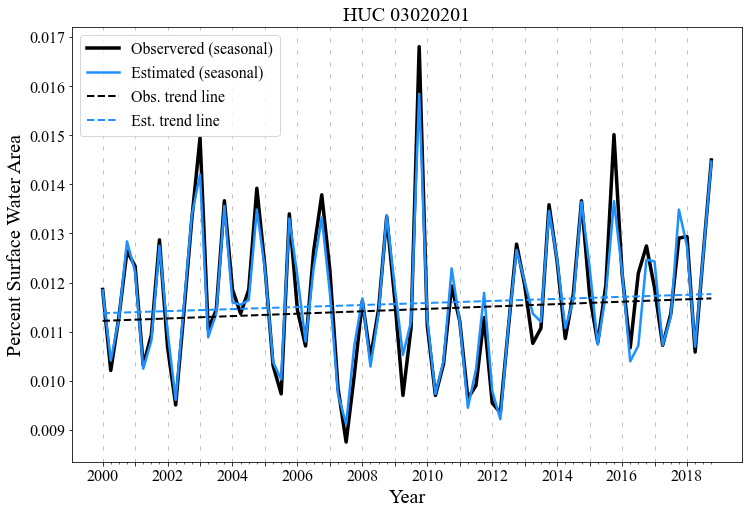

In [26]:
'''
    saves graph of seasonal surface water area values
    with MK trendline and seasonal MK function output

        data : the seasonal percent surface water area 
                data used to run the seasonal MK test
            res : the results of the seasonal MK test
    huc_name : the name of the HUC (HUC ID)
'''

est_temp_df = est_dswe[est_dswe['HUC08']==3020201]
est_temp_df = est_temp_df.set_index('YR_SZN')
obs_temp_df = dswe[dswe['HUC08']==3020201]
obs_temp_df = obs_temp_df.set_index('YR_SZN')

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = "16"

hfont = {'fontname': 'Consolas'}

# fig = plt.figure(constrained_layout=True,figsize = (14,6))
# subfigs = fig.subfigures(1,2, wspace=0, hspace=0, width_ratios=[2,1])

# ax1 = subfigs[0].subplots()
# ax2 = subfigs[1].subplots()

fig, ax1 = plt.subplots(figsize=(12, 8))
# res = mk.seasonal_test(huc_data_water, period=4)

est_res = mk.seasonal_test(est_temp_df['EST_WATER'], period=4)
obs_res = mk.seasonal_test(obs_temp_df['PR_WATER'], period=4)

est_trend_line = np.arange(len(np.asarray(est_temp_df['EST_WATER']))) / 4 * est_res.slope + est_res.intercept
obs_trend_line = np.arange(len(np.asarray(obs_temp_df['PR_WATER']))) / 4 * obs_res.slope + obs_res.intercept

ax1.plot(np.asarray(obs_temp_df['PR_WATER']),color='black',linewidth=3.5)
ax1.plot(np.asarray(est_temp_df['EST_WATER']),color='dodgerblue',linewidth=2.5)
ax1.plot(obs_trend_line,color='black',linewidth=2,linestyle='dashed')
ax1.plot(est_trend_line,color='dodgerblue',linewidth=2,linestyle='dashed')

ax1.legend(['Observered (seasonal)', 'Estimated (seasonal)', 'Obs. trend line', 'Est. trend line'])
ax1.set_xticks([0,4,8,12,16,20,24,28,32,36,40,44,48,52,56,60,64,68,72], minor=False)
ax1.set_xticks([1,2,3, 5,6,7, 9,10,11, 13,14,15, 17,18,19, 21,22,23, \
            25,26,27, 29,30,31, 33,34,35, 37,38,39, 41,42,43, \
            45,46,47, 49,50,51, 53,54,55, 57,58,59, 61,62,63, \
            65,66,67, 69,70,71, 73,74,75], minor=True)
ax1.set_xticklabels(['2000','','2002','','2004','','2006','','2008','',\
    '2010','','2012','','2014','','2016','','2018'], size = 16)

ax1.xaxis.grid(True, which='major', linestyle = (0, (5, 10)))
ax1.set_ylabel('Percent Surface Water Area',size=20)
ax1.set_xlabel('Year', size=20)
ax1.set_title('HUC {0}'.format('03020201'), size=20)

plt.savefig('../../Applications/NASA_FINESST/2022/MK_UpperNeuse2.png', dpi=300,\
        facecolor=None, edgecolor=None, transparent=True, pad_inches=0)

# ax2.text(0,0.1,\
# '       Trend presence (h) : {0}\n\
# Trend direction (trend) : {1}\n\
#             p-value (p) : {2}\n\
# Normalized test stat. (z) : {3}\n\
#     Kendall\'s Tau (Tau) : {4}\n\
# Mann-Kendall Score (s) : {5}\n\
#     Variance S (var_s) : {6}\n\
# Theil-Sen estimate/slope\n\
#                 (slope) : {7}\n\
# Kendall-Theil Robust Line \n\
# intercept (intercept) : {8}'\
#         .format(res.h, res.trend, round(res.p,6), \
#             round(res.z,6), round(res.Tau,6), res.s, \
#             res.var_s, round(res.slope,6), round(res.intercept,6)), **hfont)

# ax2.axis('off')

In [79]:
obs_temp_df['PR_WATER']

YR_SZN
200000    0.011859
200025    0.010207
200050    0.011288
200075    0.012643
200100    0.012334
            ...   
201775    0.012906
201800    0.012937
201825    0.010584
201850    0.012576
201875    0.014497
Name: PR_WATER, Length: 76, dtype: float64

In [78]:
est_temp_df['EST_WATER']

YR_SZN
200000    0.011842
200025    0.010407
200050    0.011261
200075    0.012839
200100    0.012224
            ...   
201775    0.013487
201800    0.012741
201825    0.010693
201850    0.012571
201875    0.014465
Name: EST_WATER, Length: 76, dtype: float64